In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("intern_public_dataset_2022/df_train_20220802.csv", low_memory=False)

df["request_time"] = pd.to_datetime(df["request_time"])

dic_osid = []
dic_region= []
encode_cols = ['os_id','region']
for c in encode_cols:
    if c == 'os_id':
        env,obj = pd.factorize(df[c],sort=True)
        df[c] = env
        dic_osid = obj
    else:
        env,obj = pd.factorize(df[c],sort=True)
        df[c] = env
        dic_region = obj
print(dic_osid)
print(dic_region)

df = df.fillna(df.mean())
df.dropna(axis=1,how='any',inplace=True)

Index(['Android', 'Mac', 'Windows', 'iOS'], dtype='object')
Index(['aichi', 'akita', 'aomori', 'chiba', 'ehime', 'fukui', 'fukuoka',
       'fukushima', 'gifu', 'gumma', 'hiroshima', 'hokkaido', 'hyogo',
       'ibaraki', 'ishikawa', 'iwate', 'kagawa', 'kagoshima', 'kanagawa',
       'kochi', 'kumamoto', 'kyoto', 'mie', 'miyagi', 'miyazaki', 'nagano',
       'nagasaki', 'nara', 'niigata', 'oita', 'okayama', 'okinawa', 'osaka',
       'saga', 'saitama', 'shiga', 'shimane', 'shizuoka', 'tochigi',
       'tokushima', 'tokyo', 'tottori', 'toyama', 'wakayama', 'yamagata',
       'yamaguchi', 'yamanashi'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import time
X = df.drop(['click_flg','request_time','cv_flg'], axis=1)
Y = df['click_flg']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0, stratify=Y)

In [3]:
import lightgbm as lgb
time_start_train = time.time()
model = lgb.LGBMClassifier()
model.fit(X_train,Y_train)
time_end_train = time.time()
times_train=(time_end_train-time_start_train)

time_start_pre = time.time()
predicted = model.predict_proba(X_test)
time_end_pre = time.time()
times_pre=(time_end_pre - time_start_pre)
ROC_AUC_SCORE=roc_auc_score(Y_test,predicted[:,-1])

In [8]:
print(times_train)
print(times_pre)
print(ROC_AUC_SCORE)

35.880000591278076
5.189058542251587
0.8765518000881588


In [4]:
importances = model.feature_importances_

Text(0.5, 0, 'LGBM Feature Importance')

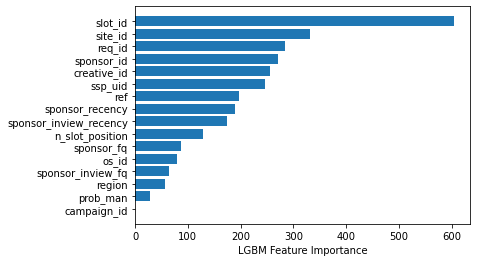

In [6]:
sorted_idx = importances.argsort()
plt.barh(X_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("LGBM Feature Importance")

In [8]:
X_train

,req_id,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,ref,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,site_id
745306,745306,3,14602,164,2.264248,3,3,59,40,20255.000000,0.525834,5,1,164,2836,74
2190347,2190347,0,152578,129,2.000000,5,5,498,39,230886.000000,0.525834,1,1,97,94,27
3565356,3565356,2,1906,14,3.000000,15,15,985,0,353680.000000,0.525834,16,3,3093,18865,10
810484,810484,0,153381,143,2.264248,0,0,10,22,537.000000,0.525834,15,7,21,3,66
2865158,2865158,3,57094,22,2.264248,7,7,35,20,124154.795406,0.525834,2,0,31722,-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731155,731155,3,11873,36,2.264248,1,1,48,40,324.000000,0.525834,15,4,14,49,21
795557,795557,0,69981,106,4.000000,17,17,293,40,124154.795406,0.525834,0,0,-1,-1,0
93283,93283,3,26729,2,2.264248,7,7,13,40,124154.795406,0.525834,1,0,14,-1,1
2632837,2632837,3,113959,110,2.264248,1,1,598,-1,259434.000000,0.525834,9,9,36,33,52
